# Predicting Clinical Trial Terminations
### Notebook 2: Preprocessing & EDA

**Author: Clement Chan**

---
Notes on the notebook:
- The previous notebook consists of the raw dataset and the steps involved in cleaning. We also performed preliminary EDA and highlighted the distribution of important columns and analyzed what potential features we should include in the model.
- In this notebook, we will complete a second round of more in-depth cleaning and exploratory data analysis. Our goal is to create a baseline model for statistical analysis, prepare for feature engineering and modelling.

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study | int |
| Enrollment | Total number of participants in a study | int |
| Funder Type | Funding type in category? | int |
| Study Type | Interventional = 1, Observational = 0 | int |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | datetime |
| Primary Completion Date | Date the final participant was examined for the first outcome | datetime |
| Completion Date | Date the final participant was examined | datetime |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<a id = 'toc'><a/>
## Table of Contents

---
1. [Data Preprocessing](#prep)


**Load the dataset**

In [2]:
# make sure to not include the index_col
df = pd.read_csv('updated_ctg.csv', index_col = 0)

# First 5 rows of dataset
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,...,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Oral Ketone Monoester Supplementation and Rest...,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,other: placebo|dietary_supplement: β-ohb,"Brain network connectivity, Functional connect...","Working memory, Computer battery to assess wor...",McMaster University,"Alzheimer's Society of Brant, Haldimand Norfol...",...,30,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2023-10-25,2024-08,2024-08,2023-08-15,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K..."
2,Investigating the Effect of a Prenatal Family ...,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,...,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
3,Pre-exposure Prophylaxis (PrEP) for People Who...,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),...,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
4,Tailored Inhibitory Control Training to Revers...,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,...,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."


Let's find the total number of rows and columns in the data.

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 482350 rows and 23 columns.


Check the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482350 entries, 0 to 482349
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 482350 non-null  object
 1   Study Status                482350 non-null  object
 2   Brief Summary               482350 non-null  object
 3   Study Results               482350 non-null  object
 4   Conditions                  482350 non-null  object
 5   Interventions               482350 non-null  object
 6   Primary Outcome Measures    482350 non-null  object
 7   Secondary Outcome Measures  482350 non-null  object
 8   Sponsor                     482350 non-null  object
 9   Collaborators               482350 non-null  object
 10  Sex                         482350 non-null  object
 11  Age                         482350 non-null  object
 12  Phases                      482350 non-null  object
 13  Enrollment                  482350

In the previous notebook, our approach was to drop columns that contain a large amount of missing values, and impute them with the string 'unknown', 'missing', and 'none'. Now, we will target specific columns that seem to have a big impact or significance in determining the `Study Status` variable.

Since the `Study Status` column is our main dependent variable that we are predicting. Let's explore the distribution again, and see if we can minimize the amount of unique values or categories.
- Start by looking at the value counts
- Visualize the distribution of the categories
- Group common categories or remove categories that are insignificant to the model.

In [5]:
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

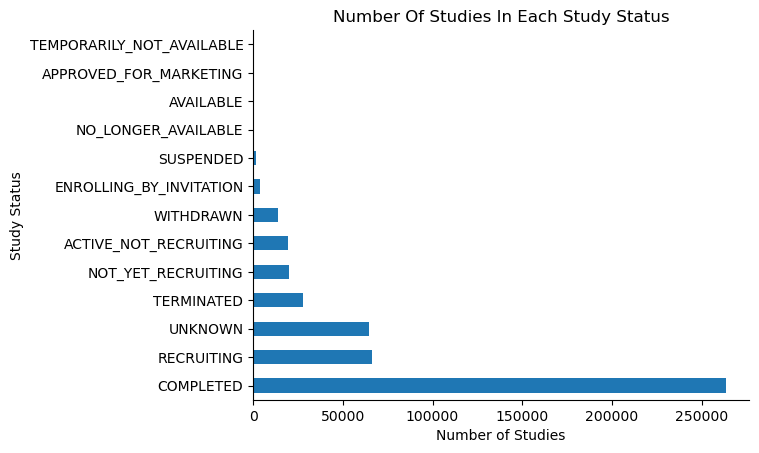

In [6]:
# Visualize counts with a graph
plt.figure()

df['Study Status'].value_counts().plot(kind='barh')

plt.title('Number of Studies in Each study status'.title())
plt.ylabel('Study Status')
plt.xlabel('Number of Studies')

sns.despine()
plt.show()

Most of the studies have been completed, which can cause some data imbalance in other classes such as our targeted 'Terminated' category. Let's continue with the cleaning, and see where we can group common categories together starting with the lowest counts `TEMPORARILY_NOT_AVAILABLE`.

In [7]:
# this option displays all columns in the dataframe
pd.options.display.max_columns = None

In [8]:
# slice out rows where study status is TEMPORARILY_NOT_AVAILABLE
df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
11239,Thrombosomes for Expanded Access Use,TEMPORARILY_NOT_AVAILABLE,Expanded use of Thrombosomes where a clinical ...,NO,Bleeding,biological: thrombosomes®,unknown,none,"Cellphire Therapeutics, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-11-06,2022-01-28,unknown
47190,"A Phase I Clinical Study of the Safety, Tolera...",TEMPORARILY_NOT_AVAILABLE,This study is designed to multiple dose and do...,NO,Healthy,drug: hx-1171,unknown,none,"Biotoxtech Co., Ltd",none,MALE,ADULT,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-06-28,2013-06-28,"Asan Medical Center, Special City of Seoul, Ko..."
53091,Treating Amyotrophic Lateral Sclerosis (ALS) W...,TEMPORARILY_NOT_AVAILABLE,R(+) pramipexole dihydrochloride monohydrate \...,NO,Amyotrophic Lateral Sclerosis,drug: r(+) pramipexole dihydrochloride monohyd...,unknown,none,"Bennett, James P., Jr., M.D., Ph.D.",University of Pittsburgh|University of Nebraska,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDIV,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2008-01-16,2012-07-25,unknown
53366,Development of a Fall Prevention and Fall Dete...,TEMPORARILY_NOT_AVAILABLE,The investigators plan to conduct a first-stag...,NO,Parkinson's Disease,other: portable motion detector,unknown,none,Far Eastern Memorial Hospital,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2010-12-20,2010-12-20,unknown
104237,Post-trial Access for Nipocalimab in Participa...,TEMPORARILY_NOT_AVAILABLE,The purpose of this post-trial access (PTA) pr...,NO,Warm Autoimmune Hemolytic Anemia,drug: nipocalimab,unknown,none,"Janssen Research & Development, LLC",none,unknown,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2022-02-03,2024-01-23,unknown


We can see that the rows where **(Study Status = Temporarily_not_available)** are missing a lot of information in the columns `Outcome_measures`, `Collaborators`, `Study Design`, and some `Locations`. Since this study status is neither completed or terminated, it doesn't provide any meaningful information to the model and we should remove these rows from the dataset.

In [9]:
# drop rows where study status = temp_not_available
df.drop(index = df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].index, inplace = True)

In [10]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
APPROVED_FOR_MARKETING        197
Name: count, dtype: int64

Next we should look at `APPROVED_FOR_MARKETING` status, and see where we can group those.

In [11]:
df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
8036,Expanded Access of Pimavanserin for Patients W...,APPROVED_FOR_MARKETING,The purpose of this program is to provide pati...,NO,Parkinson's Disease Psychosis,drug: pimavanserin tartrate,unknown,none,ACADIA Pharmaceuticals Inc.,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-05-05,2017-04-18,unknown
8345,18F-FDG PET Imaging in Cardiac Sarcoidosis,APPROVED_FOR_MARKETING,This study has been designed to provide patien...,NO,Cardiac Sarcoidosis,other: 18f-fluorodeoxyglucose (18f-fdg) pet/ct,unknown,none,British Columbia Cancer Agency,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-09,2022-02-04,"BC Cancer Agency, Vancouver, British Columbia,..."
8886,Early Access Treatment With Daratumumab for (R...,APPROVED_FOR_MARKETING,The objective of this study is to provide earl...,NO,Multiple Myeloma,drug: daratumumab,unknown,none,"Janssen Research & Development, LLC",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2015-06-23,2019-01-15,"Phoenix, Arizona, United States|Little Rock, A..."
10306,An Expanded Access Treatment Protocol of Enfor...,APPROVED_FOR_MARKETING,The primary purpose of this expanded access pr...,NO,Locally Advanced or Metastatic Urothelial Carc...,drug: enfortumab vedotin (ev),unknown,none,"Astellas Pharma Global Development, Inc.",Seagen Inc.,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-23,2020-01-13,"UCLA Hematology Oncology, Los Angeles, Califor..."
11729,An Expanded Access Study to Provide at Home Su...,APPROVED_FOR_MARKETING,"This single arm, multicenter study provides th...",NO,HER2-positive Breast Cancer,drug: pertuzumab and trastuzumab fixed-dose co...,unknown,none,"Genentech, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-05-20,2022-07-05,"Beverly Hills Cancer Center, Beverly Hills, Ca..."


Simiar to the temp_not_available, the category `APPROVED_FOR_MARKETING` is missing a lot of information in the same categories and do not provide much insight into completed or terminated trials. We can drop these rows as well.

In [12]:
# drop rows where study status = APPROVED_FOR_MARKETING
df.drop(index = df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].index, inplace = True)

In [13]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
Name: count, dtype: int64

Now, we will look into the `AVAILABLE` category to see where we can group those.

In [14]:
df[df['Study Status'] == 'AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
1049,Expanded Access to Ensartinib for Participants...,AVAILABLE,"This is an open-label, multicenter, intermedia...",NO,Non-Small Cell Lung Cancer|ALK Gene Rearrangem...,drug: ensartinib,unknown,none,"Xcovery Holdings, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-31,2022-10-20,"Stanford University, Stanford, California, 943..."
2621,Intermediate-size Expanded Access Program (EAP...,AVAILABLE,The objectives of this intermediate-size expan...,NO,Multisystem Inflammatory Syndrome in Children ...,biological: remestemcel-l|drug: hydrocortisone...,unknown,none,Mesoblast International Sàrl,none,ALL,CHILD,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-07-02,2023-05-06,unknown
3931,"Chronic Effect of Mat Pilates on Neuromotor, C...",AVAILABLE,The Pilates method aims to develop conscious c...,NO,Stroke|High Blood Pressure,other: mat pilates,unknown,none,Rio de Janeiro State University,Postgraduate scholarship,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2024-02-05,2024-02-14,"Jeferson Silva da Rocha, Rio De Janeiro, 20550..."
6425,Chelated Oral Iron Versus Intravenous Iron Suc...,AVAILABLE,compare the efficacy and safety of intravenous...,NO,Iron Deficiency Anemia of Pregnancy,drug: chelated iron|drug: iron sucrose,unknown,none,Assiut University,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-12-09,2021-12-09,unknown
7385,A Cohort IND Expanded Access Program for Suppo...,AVAILABLE,This Expanded Access Program aims to:\n\n1. Pr...,NO,Uveal Melanoma,drug: tebentafusp,unknown,none,Immunocore Ltd,"Clinigen, Inc.",ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-07-14,2022-01-21,unknown


These are the studies that are now available. However, this category is missing `Study Design`, some `Collaborators`, and `Outcome_measures`. These studies could still be waiting for more information to be filled in, so for now we will remove these rows as they will not affect our prediction model.

In [15]:
# drop rows where study status = AVAILABLE
df.drop(index = df[df['Study Status'] == 'AVAILABLE'].index, inplace = True)

In [16]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
Name: count, dtype: int64

The `NO_LONGER_AVAILABLE` status has 446 studies, let's see where we can group these.

In [17]:
df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
323743,"Use Of 3,4-Diaminopyridine (3,4-DAP) In The Tr...",NO_LONGER_AVAILABLE,"Compassionate use of orphan drug 3,4-Diaminopy...",NO,Lambert-Eaton Myasthenic Syndrome,"drug: 3,4 dap",unknown,none,The Cleveland Clinic,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,1997-09,2012-09,unknown,2011-06-14,2016-07-20,"Cleveland Clinic Foundation, Cleveland, Ohio, ..."
337080,EAP for the Treatment of Glioblastoma With PVS...,NO_LONGER_AVAILABLE,"This is an open-label, single-arm, non-randomi...",NO,Glioblastoma,biological: pvsripo,unknown,none,"Istari Oncology, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-10-23,2022-06-29,"Duke University Medical Center, Durham, North ..."
426088,Compassionate Use of MitoGel in Upper Tract Ur...,NO_LONGER_AVAILABLE,The aim of this study is to evaluate the feasi...,NO,Urothelial Carcinoma Ureteral Location,drug: mitogel,unknown,none,Jonsson Comprehensive Cancer Center,UroGen Pharma Ltd.,MALE,OLDER_ADULT,NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-03-07,2017-09-14,"UCLA, Los Angeles, California, 90024, United S..."
399410,Clinical Management Decisions for Recurrent Pr...,NO_LONGER_AVAILABLE,When evaluating prostate cancer patients for r...,NO,Prostate Cancer,drug: [11c]acetate,unknown,none,"Wendell Yap, MD",University of Kansas Medical Center,MALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-28,2018-05-16,"University of Kansas Medical Center, Kansas Ci..."
179355,Defibrotide Compassionate Use for Patients Wit...,NO_LONGER_AVAILABLE,Severe veno-occlusive disease (VOD) of the liv...,NO,Liver Diseases,drug: defibrotide,unknown,none,Emory University,none,ALL,"CHILD, ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,2005-11,2009-06,2009-06,2005-12-12,2014-07-01,"Children's Healthcare of Atlanta, Atlanta, Geo..."


Similarly with the AVAILABLE status, this category is missing information from `outcome_measures`, some `collaborators`, `Phases`, and `Study design`. We can remove these rows as well.

In [18]:
# drop rows where study status = NO_LONGER_AVAILABLE
df.drop(index = df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].index, inplace = True)

In [19]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
Name: count, dtype: int64

The suspended status is when studies are halted for an indefinite amount of time, but can resume when proper conditions are met. Let's see where we can group these statuses.

In [20]:
df[df['Study Status'] == 'SUSPENDED'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
190035,A Study Evaluating Safety and Efficacy of BIOD...,SUSPENDED,The purpose of this study is to evaluate the s...,NO,Diabetes Mellitus,drug: biod-531|drug: humalog® mix 75/25,"Change in HbA1c, 18 weeks","Postprandial glucose excursions, 18 weeks|Chan...",Biodel,none,ALL,"ADULT, OLDER_ADULT",PHASE2,13,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-05,2016-02,2016-05,2015-05-15,2016-04-07,"Meridien Research, Bradenton, Florida, 34208, ..."
91361,Study to Evaluate the Effectiveness and Safety...,SUSPENDED,The purpose of this study is to evaluate the e...,NO,Female Sexual Interest/Arousal Disorder,dietary_supplement: libicare|dietary_supplemen...,"Evolution of sexual desire and arousal, The ev...",The evolution of the composite score from sexu...,Procare Health Iberia S.L.,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,120,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-10-01,2023-10-01,2023-12-01,2019-12-06,2023-11-24,"Procare Health Iberia, Castelldefels, Barcelon..."
370118,"A Multicenter, Randomized, Double-blind, Place...",SUSPENDED,To demonstrate the superior effect of ES135 co...,NO,Spinal Cord Injuries,drug: es135,Mean change of International Standards for Neu...,none,"Eusol Biotech Co., Ltd.",none,ALL,"CHILD, ADULT, OLDER_ADULT",PHASE3,160,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-03-07,2024-12-31,2026-12-31,2017-07-25,2023-04-24,"Kaohsiung Veterans General Hospital, Kaohsiung..."
44590,Computed Optical Margin Assessment for Breast ...,SUSPENDED,This intraoperative study is a prospective stu...,NO,Breast Cancer,device: interferometric synthetic aperture mic...,Patients With All Positive/Close Margins Corre...,none,"Diagnostic Photonics, Inc.",none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,50,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2014-04,2020-02,2020-03-18,2014-12-09,2019-07-18,"Johns Hopkins Hospital, Baltimore, Maryland, 2..."
333144,Effect of the High Impact Exercise on Bone Den...,SUSPENDED,Osteoporosis has become a worldwide concern an...,NO,"Bone Loss, Age-Related,",other: high impact exercise|other: low impact ...,bone mineral density (BMD) are presented for t...,none,Fundación Santa Fe de Bogota,Instituto Colombiano para el Desarrollo de la ...,FEMALE,CHILD,NO PHASE,276,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-02,2016-11,2017-05,2015-07-02,2016-02-11,unknown


If we look at the `Completion Date` column, we can see that some dates are set in the future (2025, 2028, etc). This means that these studies could potentially startup again when conditions are met. Therefore, we should remove these rows since they are neither completed or terminated.

In [21]:
# drop rows where study status = SUSPENDED
df.drop(index = df[df['Study Status'] == 'SUSPENDED'].index, inplace = True)

In [22]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
Name: count, dtype: int64

Now let's look at `ENROLLING_BY_INVITATION` to see where we can group these statuses with.

In [23]:
df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
372308,PCSK9 Inhibition After Heart Transplantation,ENROLLING_BY_INVITATION,The focus of this study is to test the safety ...,NO,Vasculopathy,biological: alirocumab|biological: placebo,Change in volume of plaque at 1 year post stud...,"Change in LDL-C, measure differences in LDL-C ...",Stanford University,"National Heart, Lung, and Blood Institute (NHLBI)",ALL,"ADULT, OLDER_ADULT",PHASE2,120,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2019-05-13,2025-02-28,2025-02-28,2018-05-25,2023-11-28,"Stanford University, Stanford, California, 943..."
271785,Implementation and Evaluation of A Health Inno...,ENROLLING_BY_INVITATION,The goal of this stepped wedge pragmatic trial...,NO,Care Transitions,behavioral: thrive intervention,"Rates of Referrals to Homecare, We will evalua...","Feasibility, Acceptability, Appropriateness, W...",University of Pennsylvania,Rita & Alex Hillman Foundation,ALL,"ADULT, OLDER_ADULT",NO PHASE,267,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2023-03-27,2024-05-27,2024-12-30,2023-02-06,2023-04-07,"Pennsylvania Hospital, Philadelphia, Pennsylva..."
438844,Multimodal Noninvasive Assessment of Periphera...,ENROLLING_BY_INVITATION,Assessment of a novel diagnostic method for sc...,NO,Chronic Limb Threatening Ischemia,unknown,Perfusion in lower limb angiosomes assessed by...,none,Tampere University,Tampere University Hospital,ALL,"ADULT, OLDER_ADULT",NO PHASE,150,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2023-04-01,2023-04-30,2024-02-01,2023-03-27,2023-03-27,"Tampere University, Tampere, Pirkanmaa, 33720,..."
397526,The Feasibility of Home-Based Measurement of C...,ENROLLING_BY_INVITATION,Veterans with traumatic brain injury (TBI) fre...,NO,"Brain Injuries, Traumatic|Sleep Initiation and...",unknown,Feasibility of Home Dim Light Melatonin Onset ...,Functional Impairment (WHODAS 2.0 Summary Scor...,VA Office of Research and Development,none,ALL,ADULT,NO PHASE,56,FED,OBSERVATIONAL,Observational Model: |Time Perspective: p,2023-07-01,2025-03-31,2025-06-30,2022-12-27,2023-08-01,"Rocky Mountain Regional VA Medical Center, Aur..."
53753,"A Study to Evaluate the Safety, Tolerability, ...",ENROLLING_BY_INVITATION,The purpose of this First-in-Human study is to...,NO,IPF,drug: hnc1058 capsules,Number of subjects with adverse events and con...,Number of subjects with vital sign measurement...,Guangzhou Henovcom Bioscience Co. Ltd.,none,ALL,ADULT,PHASE1,32,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: SEQ...,2023-03-28,2024-03-27,2024-03-27,2023-04-07,2024-01-03,"Syneos Health, Miami, Florida, 33136, United S..."


The `ENROLLING_BY_INVITATION` status consists of studies that are currently selecting participants from a predetermine population for the research. Since this status is not within our scope of the problem, we can also remove these rows.

In [24]:
# drop rows where study status = `ENROLLING_BY_INVITATION`
df.drop(index = df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].index, inplace = True)

In [25]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                28014
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
WITHDRAWN                 13716
Name: count, dtype: int64

Next we will look at the `WITHDRAWN` status which has 13,716 studies.

In [26]:
df[df['Study Status'] == 'WITHDRAWN'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
240609,Efficacy of Reza Band for the Treatment of Lar...,WITHDRAWN,We hypothesize that tissue and salivary pepsin...,NO,Laryngopharyngeal Reflux,device: reza band,"Change in Tissue and Salivary Pepsin Levels, T...",none,Medical College of Wisconsin,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2020-07,2021-11,2021-11,2018-03-13,2020-05-08,Froedtert Hospital and Medical College of Wisc...
387083,A Comparison of Fixation Method in Total Knee ...,WITHDRAWN,The purpose of this study is to compare the ea...,NO,Osteoarthritis,device: osteopal g vs. refobacin-palacos r bon...,Tibial prosthesis part migration evaluated by ...,Micromotion of the modular polyethylen liner i...,University of Aarhus,Aarhus University Hospital|Zimmer Biomet,ALL,OLDER_ADULT,NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,unknown,unknown,2010-12,2005-09-15,2022-12-19,"Orthopaedic Center, Aarhus University Hospital..."
190858,Response of Gut Microbiota and Cardiometabolic...,WITHDRAWN,The researchers will investigate blood and fec...,NO,Healthy|Normal Weight|Overweight|Obese,other: walnut|other: nut-free,Assessing the influence of walnuts on the feca...,Assessing the influence of walnuts on blood li...,"University of California, Davis",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2022-06-01,2024-03-31,2024-11-30,2020-03-13,2023-09-18,"Ragle Human Nutrition Research Center, Davis, ..."
320731,Coronary Bifurcation Lesions Treated With Bigu...,WITHDRAWN,This study is designed to test the hypothesis ...,NO,Coronary Artery Disease,device: biguard sirolimus-eluting bifurcation ...,Incidence of Ischemia Driven Target Lesion Fai...,"In-stent late lumen loss in millimeter, In-ste...","Nanjing First Hospital, Nanjing Medical Univer...",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-12,2015-12,2015-12,2015-11-05,2017-12-06,unknown
301789,INTERCEPT Safety Evaluation in Anemic Patients,WITHDRAWN,The pathogen reduction (PR) system for Whole B...,NO,Anemia,device: intercept|device: standard of care,"Severe Transfusion Reactions, The primary safe...","Adverse events, All adverse events including a...",Swiss Transfusion SRC,Cerus Corporation,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2019-06,2020-03,2020-06,2018-04-03,2019-12-13,unknown


Withdrawn are finished studies that have stopped prematurely before enrolling it's first participant. Since this status essentially has the same meaning as the terminated status, we will group this in the same category.

In [27]:
# Use np.where() to replace 'WITHDRAWN' with 'TERMINATED'
df['Study Status'] = np.where(df['Study Status'] == 'WITHDRAWN', 'TERMINATED', df['Study Status'])

In [28]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                41730
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
Name: count, dtype: int64

`RECRUITING`, `NOT_YET_RECRUITING`, and `ACTIVE_NOT_RECRUITING` are all study statuses that are **on-going** and is not finished yet. So let's remove those rows as well since it's not within the scope of the problem.

In [29]:
# drop rows where study status = RECRUITING, NOT_YET_RECRUITING, and ACTIVE_NOT_RECRUITING
df.drop(index=df[df['Study Status'].isin(['RECRUITING', 'NOT_YET_RECRUITING', 'ACTIVE_NOT_RECRUITING'])].index, inplace=True)

In [30]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
UNKNOWN        64828
TERMINATED     41730
Name: count, dtype: int64

Finally, we should check the `UNKNOWN` status to see if we can group or remove them.

In [31]:
df[df['Study Status'] == 'UNKNOWN'].sample(10)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
208715,A Randomized Comparison of Clinical Outcomes B...,UNKNOWN,PCI of diffuse long coronary lesions still rem...,NO,Coronary Artery Disease,device: pci with absorb everolimus-eluting bio...,Incidence of composite of major adverse cardio...,none,Yonsei University,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,950,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-06,2019-05,2019-05,2016-06-10,2018-05-18,"Division of Cardiology, Department of Internal..."
446403,Efficacy Study of Vitamin D to Treat Contrast-...,UNKNOWN,The investigators planned to research the effe...,NO,Contrast-induced Nephropathy,drug: vitamin d3 tablets|drug: placebo,the prevalence of contrast-induced nephropathy...,"a change in serum creatinine level, The change...",Chinese PLA General Hospital,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,306,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-07,2017-07,2017-07,2015-07-02,2016-10-25,"PLA General Hospital, Beijing, Beijing, 100853..."
197503,A Study to Evaluate the Safety and Anti-tumor ...,UNKNOWN,"This clinical trial is a Single-Center, Open, ...",NO,Non-small Cell Lung Cancer,biological: snk01 (super natural killer cells ...,Maximum Tolerated Dose of the dose of SNK01 + ...,"Progression-free survival, Progression-Free Su...","NKMAX Co., Ltd.",none,ALL,"ADULT, OLDER_ADULT",PHASE1|PHASE2,24,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2021-07-08,2023-05-26,2023-05-26,2021-05-04,2021-07-21,"Asan Medical Center, Seoul, Songpa-gu, 05505, ..."
318707,Safety & Efficacy FloGraft (Micronized Human A...,UNKNOWN,Safety \& Efficacy of FloGraft (Micronized Hum...,NO,"Osteoarthritis, Knee",drug: mhacmb|other: placebo,"Visual Analogue Scale (VAS), Decreased Pain Le...",Western Ontario and McMaster Universities Arth...,"Applied Biologics, LLC",none,ALL,"ADULT, OLDER_ADULT",PHASE2,320,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-11,2019-02,2019-03,2018-02-22,2018-09-28,"Texas Orthopedic Hospital, Houston, Texas, 770..."
89060,Effects of Heating Massaging Vibrating Vicinit...,UNKNOWN,The aim of this experiment is to test the phar...,NO,DIABETES,unknown,unknown,none,Hadassah Medical Organization,none,MALE,"ADULT, OLDER_ADULT",NO PHASE,100,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2008-11,unknown,unknown,2011-03-03,2011-03-03,"Hadassah Medical Organization,, Jerusalem, Israel"
193520,Miniflare Versus Long Protocol in Poor Responders,UNKNOWN,The study is performed to compare the outcomes...,NO,Infertility,drug: triptorelin|drug: combined oral contrace...,"Number of oocytes retrieved, 6 months",none,"Woman's Health University Hospital, Egypt",none,FEMALE,ADULT,NO PHASE,200,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2016-02,2016-09,2016-09,2016-02-12,2016-04-04,"Kasr el aini hospital, Cairo, 12211, Egypt"
57292,"Questionnaire for the Evaluation of Anger, Hos...",UNKNOWN,The incidence of aggression and violent behavi...,NO,Cerebral Lesion,other: questionnaire,"Questionnaire evaluation by Rasch methodology,...",none,Eric Durand,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,50,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2019-04-09,2021-12,2021-12,2019-07-26,2019-07-26,"Brugmann University Hospital, Brussels, 1020, ..."
62789,Effects of Whole Body Vibration Training in Pa...,UNKNOWN,Interstitial lung disease (ILD) is a diverse g...,NO,Interstitial Lung Disease|Scleroderma|Idiopath...,other: whole body vibration training,"Pulmonary Function Test, The pulmonary functio...","Timed Up and Go Test (TUG), TUG is a reliable ...",Istanbul University,none,ALL,"ADULT, OLDER

Since we don't know the status of these studies and we cannot classify them based on other columns without a strong bias. We will just drop all the unknown study status for now.

In [32]:
# drop rows where study status = `UNKNOWN`
df.drop(index = df[df['Study Status'] == 'UNKNOWN'].index, inplace = True)

In [33]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED     263380
TERMINATED     41730
Name: count, dtype: int64

Great! Now that we have removed all the statuses that aren't related to predicting clinical trial terminations, we can convert the study status into binary values.

Next, we need to reset the index for our dataframe and convert the terminated status into 1 and the completed status into 0.

In [34]:
# reset dataframe index
df.reset_index(drop = True, inplace = True)

In [35]:
# Convert Study Status values into binary
df['Study Status'] = np.where(df['Study Status'] == 'TERMINATED', 1, 0)

In [36]:
# Sanity + distribution of data check
df['Study Status'].value_counts(normalize=True)

Study Status
0    0.86323
1    0.13677
Name: proportion, dtype: float64

**Important Notes:**
Wow there is a massive data imbalance in our dataset where 86.3% are completed and 13.7% are terminated trials. If we did not have a predictive model and guessed whether trials are completed or terminated, 86.3% of the time you would get a completed result. Therefore to analyze our models, we definitely need to look at precision and recall metrics to find out how good the model really is.

To improve our data imbalance, we could perform some upsampling/desampling of the data during modelling to see how that will affect our results.

Next, let's look into the `Study Results` which can be turned into a binary column as well.

In [37]:
df['Study Results'].value_counts(normalize = True)

Study Results
NO     0.799413
YES    0.200587
Name: proportion, dtype: float64

Around 80% of the studies did not post results. I wonder if this would have any affect on clinical trial terminations...

In [38]:
# Convert Study Results into binary
df['Study Results'] = np.where(df['Study Results'] == 'YES', 1, 0)

In [39]:
# Sanity check
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U..."


Next we will look into the `Sex` column and see if we can turn them into dummy variables.

In [40]:
df['Sex'].value_counts()

Sex
ALL        260212
FEMALE      29436
MALE        15105
unknown       357
Name: count, dtype: int64

Interesting to note that there are 357 unknowns. 
- We should be able to group them with 'ALL', because the study would only choose to recruit male or female participants if that was the requirement for their clinical trial.
- Then we can turn this column into dummy variables with pd.get_dummies()

In [41]:
# replacing `unknown` with `ALL`
df['Sex'] = np.where(df['Sex'] == 'unknown', 'ALL', df['Sex'])

In [42]:
# Creating dummy variables with prefix
sex_dummy = pd.get_dummies(df['Sex'], prefix='Sex', dtype=int)

# Concatenate dummies to df and drop Sex column
df = pd.concat([df, sex_dummy], axis = 1)
df.drop(columns = 'Sex', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,"CHILD, ADULT",NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,"CHILD, ADULT, OLDER_ADULT",NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ADULT,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,"ADULT, OLDER_ADULT",PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0


This looks very good. Now we will move onto the `Age` column and try to break it down further for modelling.

In [43]:
df['Age'].value_counts()

Age
ADULT, OLDER_ADULT           194578
ADULT                         45937
CHILD, ADULT, OLDER_ADULT     28746
CHILD                         19260
CHILD, ADULT                  12144
OLDER_ADULT                    4445
Name: count, dtype: int64

We can notice that one study can have multiple age groups. The most popular age group are studies that have both `ADULT` and `OLDER_ADULT` participants.
- We can use str.get_dummies() to separate the groups and turn them into dummy variables.

In [44]:
# Creating dummy variables with prefix
age_dummy = df['Age'].str.get_dummies(sep=', ').add_prefix('Age_')

# Concatenate dummies to df and drop Age column
df = pd.concat([df, age_dummy], axis = 1)
df.drop(columns = 'Age', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,NO PHASE,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,NO PHASE,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),NO PHASE,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0,1,0,1
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,NO PHASE,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,PHASE2,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1


Next we will look at the trial `Phases` and investigate if we can group common values and turn them into dummy variables.

In [45]:
df['Phases'].value_counts()

Phases
NO PHASE         168986
PHASE2            38291
PHASE1            32613
PHASE3            27504
PHASE4            22433
PHASE1|PHASE2      8522
PHASE2|PHASE3      4183
EARLY_PHASE1       2578
Name: count, dtype: int64

**Notes**
- "EARLY_PHASE1" consists of exploratory trials involving very limited human exposure and zero diagnostic or therapeutic intent.
- "PHASE1|PHASE2" or "PHASE2|PHASE3" are studies that are a combination of the 2 phases. We can definitely separate these with dummies.
- "PHASE1" are initial studies that look at side effects, increased/decreased dosages, early effectiveness of drugs.
- "PHASE2" studies aim to determine common short-term side effects, and effectiveness of drugs under a specific environment.
- "PHASE3" are trials conducted after preliminary evidence of effectiveness, and gather additional information of the overall drug performance.
- "PHASE4" are FDA-approved drugs that look into benefits/risks and optimal use cases.
- "NO PHASE" are studies that do not have a phase such as behavioural interventions or studies of devices.

We can also use str.get_dummies() to get this column ready for modelling.

In [46]:
# Creating dummy variables with prefix
phases_dummy = df['Phases'].str.get_dummies().add_prefix('Phases_')

# Concatenate dummies to df and drop Phases column
df = pd.concat([df, phases_dummy], axis = 1)
df.drop(columns = 'Phases', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0,0,1,0,0,0,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1,0,1,0,0,0,0
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0,1,0,1,0,1,0,0,0,0
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0,0,1,0,0,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,44,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1,0,0,0,1,0,0


In the first notebook we found that the `Enrollment` column was heavily right skewed. Let's visualize this again and see how we can perform feature engineering.

In [47]:
# .describe() looks at the summary statistics of the column
df['Enrollment'].describe()

count    3.051100e+05
mean     3.941437e+03
std      4.116496e+05
min      0.000000e+00
25%      2.400000e+01
50%      6.000000e+01
75%      1.570000e+02
max      1.888141e+08
Name: Enrollment, dtype: float64

The distribution is insanely right skewed. Enrollment in each study ranges from 0 to 188 million participants while the **mean** being 3941 participants and **median** being 60 participants.

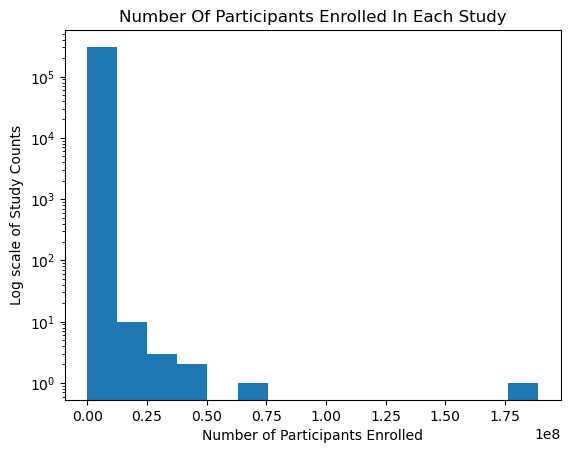

In [48]:
# visualize the distribution
plt.figure()

plt.hist(df['Enrollment'], bins = 15)
plt.yscale('log') # log the y axis to minimize the counts

plt.title('Number of Participants Enrolled in Each Study'.title())
plt.xlabel('Number of Participants Enrolled')
plt.ylabel('Log scale of Study Counts')

plt.show()

Even with a log scale, it is hard to view the average participant enrolled in each study.
- To prepare this column for modelling, we will perform **adaptive binning** which will place the bins according to the distribution of the data.
- We will split the data into deciles where there will be 10% of the data in each bin.

source: (https://mylearningsinaiml.wordpress.com/ml-models/feature-engineering/feature-engineering-numeric-data/)

In [49]:
# Create list that stores deciles
quantile_list = np.arange(0.0, 1.1, 0.1)

# .quantile() splits the distribution equally
quantiles = df['Enrollment'].quantile(quantile_list)
quantiles

0.0            0.0
0.1            9.0
0.2           20.0
0.3           30.0
0.4           42.0
0.5           60.0
0.6           80.0
0.7          120.0
0.8          210.0
0.9          491.0
1.0    188814085.0
Name: Enrollment, dtype: float64

Interesting to note that at the 90th percentile, the number of participants are between 0 and 491, and then the enrollment number jumps enormously.

We can use pd.qcut() to discretize the values into equal sized quantiles.

In [50]:
# impute enrollment values with the new bins
df['Enrollment'] = pd.qcut(df['Enrollment'], q = quantile_list)
# sanity check
df['Enrollment'].value_counts()

Enrollment
(9.0, 20.0]             35123
(42.0, 60.0]            34239
(-0.001, 9.0]           30899
(80.0, 120.0]           30546
(491.0, 188814085.0]    30484
(210.0, 491.0]          30466
(120.0, 210.0]          30311
(20.0, 30.0]            29075
(30.0, 42.0]            27622
(60.0, 80.0]            26345
Name: count, dtype: int64

Nice, this looks pretty evenly distributed. Now to prepare for modelling, we can turn these categories into dummy variables.

In [51]:
# Create dummy variable
enrollment_dummy = pd.get_dummies(df['Enrollment'], prefix= 'Enrollment_', dtype=int)

# Concatenate dummies to df and drop Enrollment column
df = pd.concat([df, enrollment_dummy], axis = 1)
df.drop(columns = 'Enrollment', inplace = True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,"Enrollment__(-0.001, 9.0]","Enrollment__(9.0, 20.0]","Enrollment__(20.0, 30.0]","Enrollment__(30.0, 42.0]","Enrollment__(42.0, 60.0]","Enrollment__(60.0, 80.0]","Enrollment__(80.0, 120.0]","Enrollment__(120.0, 210.0]","Enrollment__(210.0, 491.0]","Enrollment__(491.0, 188814085.0]"
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Now we will look at the `Study Type` column and see what preprocessing we can perform.

In [52]:
df['Study Type'].value_counts(normalize = True)

Study Type
INTERVENTIONAL    0.796709
OBSERVATIONAL     0.203291
Name: proportion, dtype: float64

Most of the study types in this clinical trial dataset are "INTERVENTIONAL" (79.7%) which are treatments or actions taken to prevent or treat disease. The rest are "OBSERVATIONAL" studies (20.3%) which are therapeutic, diagnostic or other treatments that do not have a specific intervention method.

Since there are only 2 categories in this column, we can just assign binary values.
- Interventional = 1
- Observational = 0

In [53]:
df['Study Type'] = np.where(df['Study Type'] == 'INTERVENTIONAL', 1, 0)

# sanity check
df['Study Type'].value_counts()

Study Type
1    243084
0     62026
Name: count, dtype: int64

The `Funder Type` column is next.

In [54]:
df['Funder Type'].value_counts()

Funder Type
OTHER        195419
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
INDIV           397
UNKNOWN          32
AMBIG             3
Name: count, dtype: int64

- There are 9 unique values in this column with "OTHER" being the largest count.
- We should be able to group "AMBIG" and "UNKNOWN" funder types with "OTHER".
- There seems to be 2 major categories: Industry and Government related funding.

In [55]:
# use .isin to slice out AMBIG and UNKNOWN values to change
df['Funder Type'] = np.where(df['Funder Type'].isin(['AMBIG', 'UNKNOWN']), 'OTHER', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195454
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
INDIV           397
Name: count, dtype: int64

So far so good. Now let's look into a few of these Funder Types to see if we can group them some more.

In [56]:
# Studies funded by individuals
df[df['Funder Type']=='INDIV'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,"Enrollment__(-0.001, 9.0]","Enrollment__(9.0, 20.0]","Enrollment__(20.0, 30.0]","Enrollment__(30.0, 42.0]","Enrollment__(42.0, 60.0]","Enrollment__(60.0, 80.0]","Enrollment__(80.0, 120.0]","Enrollment__(120.0, 210.0]","Enrollment__(210.0, 491.0]","Enrollment__(491.0, 188814085.0]"
121288,Determination of the Optimum Delivery Route fo...,0,Epiphora or excessive tearing is a significant...,0,Epiphora,drug: botulinum toxin type a|drug: botulinum t...,Comparison of 1-minute Schirmer's test with an...,Comparison of side effect between each treatme...,"Merbs, Shannath, M.D., Ph.D.",none,INDIV,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2011-02,2012-09,2012-09,2011-01-25,2012-09-12,"Wilmer Eye Institute, Baltimore, Maryland, 212...",1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
54106,A Simple Clinical Maneuver to Reduce Laparosco...,0,A pulmonary recruitment maneuver at the end of...,0,Shoulder Pain,procedure: recruitment manouver,"Intensity of shoulder pain, 48 hours after dis...","Incidence of Nausea and Vomiting, 24hrs after ...","Phelps, Paul, M.D.","University of California, San Francisco",INDIV,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2004-02,unknown,2005-02,2007-12-18,2007-12-18,Inland Valley and Rancho Springs Medical Cente...,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
298577,Stem Cell Study for Patients With Heart Disease,0,The purpose of this study is to determine if c...,0,Chest Pain|Myocardial Ischemia|Heart Disease|C...,genetic: cell therapy - autologous cd34 positi...,unknown,none,"Losordo, Douglas, M.D.",none,INDIV,1,Allocation: RANDOMIZED|Intervention Model: |Ma...,2004-01,2006-03,2006-06,2004-04-28,2008-01-29,"Scripps Clinic, La Jolla, California, 92037, U...",1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
16014,Safety Study of Depakote Versus Lithium in Afr...,1,It is hypothesized that Depakote will be bette...,0,Bipolar Disorder,drug: depakote|drug: lithium,"psychopathology: YMRS, MADRS|Tolerability: Uku...","HAMD, CGI-BP, HAM A,CORE, MADRS","Lawson, William B., M.D., PhD, DFAPA",Abbott,INDIV,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2006-12,2006-12,2006-12,2010-02-24,2010-02-24,"Howard University Hospital, Washington, Distri...",1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
49325,Toronto and Oak Ridge Photobiomodulation Study...,0,The purpose of this study is to evaluate clini...,0,Nonexudative Age-related Macular Degeneration,"device: photobiomodulation (gentlewaves, warp 10)","Change in ETDRS Visual Acuity, prior to interv...","change in contrast sensitivity, prior to inter...","Merry, Graham, M.D.",none,INDIV,1,Allocation: NA|Intervention Model: SINGLE_GROU...,2009-01,2011-08,2011-08,2009-07-16,2011-11-18,"Dr Robert Dotson, Oak Ridge, Tennessee, 37830,...",1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


Since the sample size of studies funded by individuals are very low, it is not worth looking into them as a separate category. Therefore, we will group them with "OTHER".

In [57]:
df['Funder Type'] = np.where(df['Funder Type'] == 'INDIV', 'OTHER', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195851
INDUSTRY      87685
NIH            9185
OTHER_GOV      6113
FED            3245
NETWORK        3031
Name: count, dtype: int64

In [58]:
# Network is next
df[df['Funder Type']=='NETWORK'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,"Enrollment__(-0.001, 9.0]","Enrollment__(9.0, 20.0]","Enrollment__(20.0, 30.0]","Enrollment__(30.0, 42.0]","Enrollment__(42.0, 60.0]","Enrollment__(60.0, 80.0]","Enrollment__(80.0, 120.0]","Enrollment__(120.0, 210.0]","Enrollment__(210.0, 491.0]","Enrollment__(491.0, 188814085.0]"
117291,Conditioning Regimen Before Infusion of Alloge...,0,Unrelated Donor Hematopoietic Stem Cell Transp...,0,HEMATOLOGIC MALIGNANCIES,unknown,"treatment-related mortality and engraftment, a...","regimen-related toxicities, graft-versus-host-...",Cooperative Study Group A for Hematology,none,NETWORK,0,Observational Model: |Time Perspective: p,2003-12,2008-03,2008-12,2008-10-10,2011-06-10,"Asan Medical Center, Seoul, 138-736, Korea, Re...",1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
227498,Imatinib in Patients With Desmoid Tumor and Ch...,0,The purpose of this study is to determine whet...,0,Advanced Desmoid Tumor|Advanced Chondrosarcoma,drug: imatinib mesylate,Tumor response will be evaluated by different ...,none,Italian Sarcoma Group,none,NETWORK,1,Allocation: NA|Intervention Model: SINGLE_GROU...,2007-05,2018-12,2018-12,2009-06-26,2023-10-05,Centro di Riferimento Oncologico - Unit of Med...,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
272874,Pulses of Vincristine and Dexamethasone in BFM...,0,Studies in the 1970s and 1980s suggested that ...,0,Acute Lymphoblastic Leukemia,drug: vincristine|drug: dexamethasone,disease free survival,survival,International BFM Study Group,Associazione Italiana Ematologia Oncologia Ped...,NETWORK,1,Allocation: RANDOMIZED|Intervention Model: PAR...,1995-04,unknown,2004-01,2006-12-14,2006-12-14,"Department of Pediatric Hematology-Oncology, I...",1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
290586,Comparison of the Fixed Combinations of Brimon...,0,This study compares the efficacy and tolerabil...,0,Open-Angle Glaucoma|Ocular Hypertension,drug: brimonidine tartrate 0.2%/timolol maleat...,"Change from baseline in mean IOP., 12 weeks",Patient tolerability/comfort measured by Liker...,"Bp Consulting, Inc",Allergan,NETWORK,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2005-01,2006-04,2006-04,2009-01-14,2009-01-14,"Barrie, Ontario, Canada",1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
137724,Neoadjuvant Afatinib Window Study in Squamous ...,0,The general objectives are to evaluate the pre...,0,"Carcinoma, Squamous Cell of Head and Neck",drug: afatinib|other: observation,Reduction of tumor Standardised Uptake Volume ...,Evaluation of tumour response to treatment by ...,European Organisation for Research and Treatme...,Boehringer Ingelheim,NETWORK,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-07,2015-08,2015-08,2012-02-24,2018-07-09,"Institut Jules Bordet, Brussels, 1000, Belgium...",1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


These studies seem to be studied by a network of different Industries. We will group these categories with "INDUSTRY".

In [59]:
df['Funder Type'] = np.where(df['Funder Type'] == 'NETWORK', 'INDUSTRY', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER        195851
INDUSTRY      90716
NIH            9185
OTHER_GOV      6113
FED            3245
Name: count, dtype: int64

The categories 'NIH', 'OTHER_GOV', and 'FED' all are government related agencies. We can group them into one single category called "GOVERNMENT".

In [60]:
# use .isin to slice out NIH, OTHER_GOV and FED values to impute
df['Funder Type'] = np.where(df['Funder Type'].isin(['NIH', 'OTHER_GOV', 'FED']), 'GOVERNMENT', df['Funder Type'])

# sanity check
df['Funder Type'].value_counts()

Funder Type
OTHER         195851
INDUSTRY       90716
GOVERNMENT     18543
Name: count, dtype: int64

This looks much more organized and better for our model. Before we turn these categories into dummy variables, let's visualize the distribution because they look very different in counts!

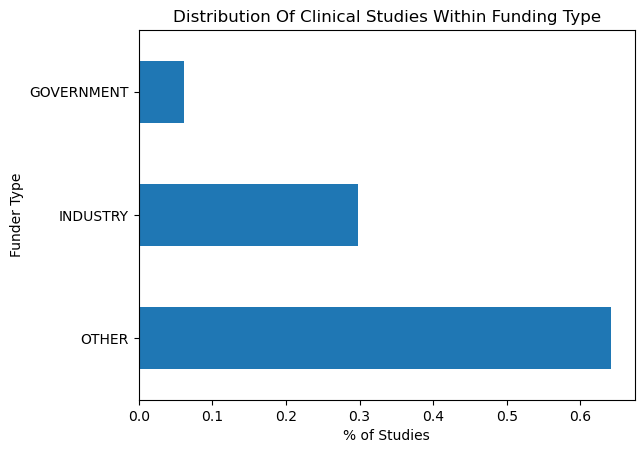

In [61]:
plt.show()

df['Funder Type'].value_counts(normalize = True).plot(kind='barh')
plt.title('Distribution of Clinical Studies within Funding Type'.title())
plt.xlabel('% of Studies')
plt.ylabel('Funder Type')

plt.show()

Most of the studies are in the "OTHER" funding type which are funded by Universities, Individuals, Unknowns, etc. There seems to be much fewer Government funded studies in the dataset, so this would be interesting to note.

Now we will expand the `Funder Type` column into dummy variables.

In [62]:
funder_dummy = pd.get_dummies(df['Funder Type'], prefix='Funder_Type_', dtype=int)

# concat the dummy variables and drop `Funder Type` in the dataframe
df = pd.concat([df, funder_dummy], axis=1)
df.drop(columns='Funder Type', inplace=True)
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,"Enrollment__(-0.001, 9.0]","Enrollment__(9.0, 20.0]","Enrollment__(20.0, 30.0]","Enrollment__(30.0, 42.0]","Enrollment__(42.0, 60.0]","Enrollment__(60.0, 80.0]","Enrollment__(80.0, 120.0]","Enrollment__(120.0, 210.0]","Enrollment__(210.0, 491.0]","Enrollment__(491.0, 188814085.0]",Funder_Type__GOVERNMENT,Funder_Type__INDUSTRY,Funder_Type__OTHER
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,1,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),1,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01,2012-08,2012-08,2010-01-25,2016-03-08,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Next let's clean up the date columns and make sure the data type is 'datetime'.
- We should remove the columns `First Posted` and `Last Update Posted`, because the posting dates do not provide much insight in predicting trial terminations.
- In the previous notebook, we filled in the missing dates with the string 'unknown'. We should've imputed an empty string instead, so we can change the data type.
- Then we should convert the columns `Start Date`, `Primary Completion Date`, and `Completion Date` into datetime.

In [63]:
# drop posted dates
df.drop(columns = ['First Posted', 'Last Update Posted'], inplace = True)

In [68]:
# Change the unknowns of each column in dates into empty strings
dates = ['Start Date', 'Primary Completion Date', 'Completion Date']

for i in dates:
    df[i] = np.where(df[i] == 'unknown', '', df[i])
    # Change the data type into datetime
    df[i] = pd.to_datetime(df[i], format='mixed')
    
# sanity check
df[dates].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305110 entries, 0 to 305109
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Start Date               302231 non-null  datetime64[ns]
 1   Primary Completion Date  289034 non-null  datetime64[ns]
 2   Completion Date          295375 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 7.0 MB


In [ ]:
df['Collaborators'].value_counts()

In [ ]:
test = df['Collaborators'].str.split('|', n=1).str[0]

In [ ]:
test

In [ ]:
test.value_counts()

In [ ]:
df['Locations'].value_counts()

In [70]:
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,Locations,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,Phases_NO PHASE,Phases_PHASE1,Phases_PHASE2,Phases_PHASE3,Phases_PHASE4,"Enrollment__(-0.001, 9.0]","Enrollment__(9.0, 20.0]","Enrollment__(20.0, 30.0]","Enrollment__(30.0, 42.0]","Enrollment__(42.0, 60.0]","Enrollment__(60.0, 80.0]","Enrollment__(80.0, 120.0]","Enrollment__(120.0, 210.0]","Enrollment__(210.0, 491.0]","Enrollment__(491.0, 188814085.0]",Funder_Type__GOVERNMENT,Funder_Type__INDUSTRY,Funder_Type__OTHER
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,"Sangath, New Delhi, Delhi, 110016, India",1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,1,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08-01,2014-12-01,2014-12-01,Palestinian Ministry of Health Maternal Child ...,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),1,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03-01,2022-03-01,2022-03-01,unknown,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09-01,2016-04-01,2016-05-01,"University of Oregon, Social and Affective Neu...",1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,1,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-01-01,2012-08-01,2012-08-01,"MUSC, Charleston, South Carolina, 294258908, U...",1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305110 entries, 0 to 305109
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Study Title                       305110 non-null  object        
 1   Study Status                      305110 non-null  int32         
 2   Brief Summary                     305110 non-null  object        
 3   Study Results                     305110 non-null  int32         
 4   Conditions                        305110 non-null  object        
 5   Interventions                     305110 non-null  object        
 6   Primary Outcome Measures          305110 non-null  object        
 7   Secondary Outcome Measures        305110 non-null  object        
 8   Sponsor                           305110 non-null  object        
 9   Collaborators                     305110 non-null  object        
 10  Study Type                      

In [ ]:
df['Funder_Type__INDUSTRY'].sum()